In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestClassifier

## ETL(Extract, Transform, Load)

In [125]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Transfrom

Lets Transform the other column that is category.
1) let transform the work type in to 0:Never work, 1:Children, 2:Self-employed, 3:Govt_job, 4:Private <br>
2) let transform the smoking_status in to 0:never smoked, 1:Unknown, 2:smokes, 3:formerly smoked <br>
3) let transform the Marriage_status in to 0:No and 1:Yes <br>
4) Let transform the residence type into 0:Rural and 1:Urban <br>
5) Let transform the gender type into 0:Female and 1:Male <br>

<b>Data type Transform for WORK<b/>

In [3]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [4]:
# let transform the work type in to 0:Never work, 1:Children, 2:Self-employed, 3:Govt_job, 4:Private
type_of_work = []
for work in data['work_type']:
    if work == "Never_worked":
        type_of_work.append(0)
    elif work == "children":
        type_of_work.append(1)
    if work == "Self-employed":
        type_of_work.append(2)
    elif work == "Govt_job":
        type_of_work.append(3)
    elif work == 'Private':
        type_of_work.append(4)
        
type_of_work[0:5]

[4, 2, 4, 4, 2]

<b>Data type Transform for Smoking Status<b/>

In [5]:
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [6]:
# let transform the smoking_status in to 0:never smoked, 1:Unknown, 2:smokes, 3:formerly smoked
smoking_statusT = []
for work in data['smoking_status']:
    if work == "never smoked":
        smoking_statusT.append(0)
    elif work == "Unknown":
        smoking_statusT.append(1)
    if work == "smokes":
        smoking_statusT.append(2)
    elif work == 'formerly smoked':
        smoking_statusT.append(3)
        
smoking_statusT[0:5]


[3, 0, 0, 2, 0]

<b>Data type Transform for Married Status<b/>

In [7]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
# let transform the Marriage_status in to 0:No and 1:Yes
Marriage_status = []
for marriage in data['ever_married']:
    if marriage == "Yes":
        Marriage_status.append(1)
    else:
        Marriage_status.append(0)
        
Marriage_status[0:5]

[1, 1, 1, 1, 1]

<b>Data type Transform for Type of Residency<b/>

In [9]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [10]:
# Let transform the residence type into 0:Rural and 1:Urban
residence_type = []
for residence in data['Residence_type']:
    if residence == "Urban":
        residence_type.append(1)
    else:
        residence_type.append(0)

residence_type[0:5]

[1, 0, 0, 1, 0]

<b>Data type Transform for Gender<b/>

In [11]:
# Let transform the gender type into 0:Female and 1:Male
Gender = []
for sex in data['gender']:
    if sex == "Male":
        Gender.append(1)
    else:
        Gender.append(0)

Gender[0:5]

[1, 0, 1, 0, 0]

## Feature Selection

In [12]:
data['gender'] = Gender
data['ever_married'] = Marriage_status
data['work_type'] = type_of_work
data['Residence_type'] = residence_type
data['smoking_status'] = smoking_statusT
data.head()
x = data.drop(columns = ['id'])
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,4,1,228.69,36.6,3,1
1,0,61.0,0,0,1,2,0,202.21,NaN,0,1
2,1,80.0,0,1,1,4,0,105.92,32.5,0,1
3,0,49.0,0,0,1,4,1,171.23,34.4,2,1
4,0,79.0,1,0,1,2,0,174.12,24.0,0,1


In [13]:
# Lets find what column have a null value
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


#### As you can see the column bmi is the only column have a null value which is have a total of 5110 - 4909 = 201 null values.

### Drop NaN value on the avg_glucose _level

In [14]:
# now lets removed a row that bmi have a null value
x = x.dropna(subset = ['bmi'])
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


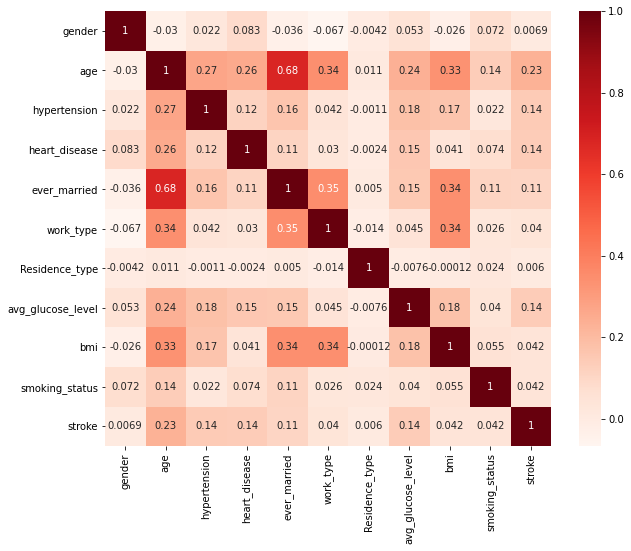

In [15]:
#so we will know if there's who have a high corellation on the stroke in each column/attribute on the data.
#Using Coefficient of Determination (R^2)
plt.figure(figsize=(10,8))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
correlated_data = x.corr().sort_values(by = 'stroke', ascending = True)
stroke_corr = correlated_data['stroke']
stroke_corr.head()

Residence_type    0.006031
gender            0.006939
work_type         0.040036
smoking_status    0.041694
bmi               0.042374
Name: stroke, dtype: float64

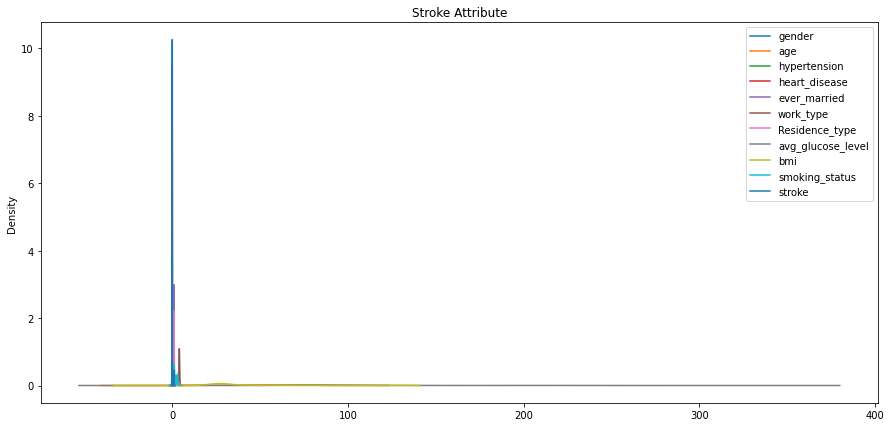

In [17]:
x.plot.kde(ind=100, legend=True, figsize=(15,7))
plt.title('Stroke Attribute');

# Data Modelling

### Feature Selection

In [18]:
X = x[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status' ]]
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,4,1,228.69,36.6,3
2,1,80.0,0,1,1,4,0,105.92,32.5,0
3,0,49.0,0,0,1,4,1,171.23,34.4,2
4,0,79.0,1,0,1,2,0,174.12,24.0,0
5,1,81.0,0,0,1,4,1,186.21,29.0,3


In [19]:
y = x[['stroke']]
y.head()

,stroke
0,1
2,1
3,1
4,1
5,1


In [20]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.20044746,  1.07013796, -0.31806673,  4.38196829,  0.72948428,
         0.76450051,  0.98563987,  2.77769839,  0.98134488,  1.72434754],
       [ 1.20044746,  1.64656262, -0.31806673,  4.38196829,  0.72948428,
         0.76450051, -1.01456935,  0.0138418 ,  0.45926914, -1.01833161],
       [-0.83302272,  0.27201152, -0.31806673, -0.22820795,  0.72948428,
         0.76450051,  0.98563987,  1.48413156,  0.70120668,  0.81012116],
       [-0.83302272,  1.60222226,  3.14399438, -0.22820795,  0.72948428,
        -0.98879686, -1.01456935,  1.54919261, -0.62308299, -1.01833161],
       [ 1.20044746,  1.69090297, -0.31806673, -0.22820795,  0.72948428,
         0.76450051,  0.98563987,  1.82136844,  0.01359474,  1.72434754]])

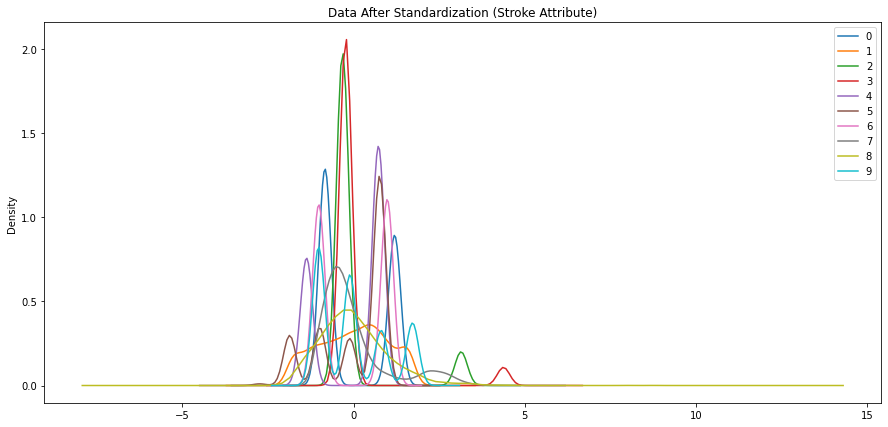

In [21]:
stan_data = pd.DataFrame(X)
stan_data.plot.kde(ind=100, legend=True, figsize=(15,7))
plt.title('Data After Standardization (Stroke Attribute)');

### Creating test and train data coming from the dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3436, 10) (3436, 1)
Test set: (1473, 10) (1473, 1)


### Random Forest Model

In [27]:
RF = RandomForestClassifier( max_depth= 10, random_state=0, n_estimators=10)
RFF = RF.fit(X_train, y_train)

<ipython-input-27-a29eaea300bc>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFM = RF.fit(X_train, y_train)


In [31]:
#Get the Score of Random Forest Classifier both Train and Test
RFM_Train = RF.score(X_train, y_train)
RFM_Test = clf.score(X_test, y_test)
print('Random Forest Train Score: ' + str(RFM_Train))
print('Random Forest Test Score: ' + str(RFM_Test))

Random Forest Train Score: 0.9743888242142026
Random Forest Test Score: 0.9606245756958588


In [36]:
#Predict value of RFM
RFM_pred = RFM.predict(X_test)
RFM_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Logistic Regression Classifier

In [33]:
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression(random_state=0)
LRCF = LRC.fit(X_train, y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
#Get the Score of Logistic Regression Classifier both Train and Test
LRC_Train = LRC.score(X_train, y_train)
LRC_Test = LRC.score(X_test, y_test)
print('Logistic Regression Classifier Train Score: ' + str(LRC_Train))
print('Logistic Regression Classifier Test Score: ' + str(LRC_Test))

Logistic Regression Classifier Train Score: 0.9551804423748544
Logistic Regression Classifier Test Score: 0.9626612355736592


In [56]:
#Predict value of LRC
LRC_pred = LRC.predict(X_test)
LRC_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Support Vector Machine (SVM)

In [57]:
from sklearn import svm
SVM = svm.SVC()
SVMF = SVM.fit(X_train, y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [58]:
#Get the Score of Support Vector Machine both Train and Test
SVM_Train = SVM.score(X_train, y_train)
SVM_Test = SVM.score(X_test, y_test)
print('Support Vector Machine Train Score: ' + str(SVM_Train))
print('Support Vector Machine Test Score: ' + str(SVM_Test))

Support Vector Machine Train Score: 0.9551804423748544
Support Vector Machine Test Score: 0.9626612355736592


In [59]:
#Predict value of SVM
SVM_pred = SVM.predict(X_test)
SVM_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
KNNF = neigh.fit(X_train, y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [61]:
#Get the Score of KNN Classifier both Train and Test
KNN_Train = neigh.score(X_train, y_train)
KNN_Test = neigh.score(X_test, y_test)
print('KNN Classifier Train Score: ' + str(KNN_Train))
print('KNN Classifier Machine Test Score: ' + str(KNN_Test))

KNN Classifier Train Score: 0.9551804423748544
KNN Classifier Machine Test Score: 0.9626612355736592


In [62]:
#Predict value of KNN
KNN_pred = neigh.predict(X_test)
KNN_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Naive Bayes Classifier 

In [63]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBCF = NBC.fit(X_train, y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [64]:
#Get the Score of Naive Bayes Classifier both Train and Test
NBC_Train = NBC.score(X_train, y_train)
NBC_Test = NBC.score(X_test, y_test)
print('Naive Bayes Classifier Train Score: ' + str(NBC_Train))
print('Naive Bayes Classifier Test Score: ' + str(NBC_Test))

Naive Bayes Classifier Train Score: 0.8672875436554133
Naive Bayes Classifier Test Score: 0.8866259334691107


In [65]:
#Predict value of Naive Bayes Classifier
NBC_pred = NBC.predict(X_test)
NBC_pred[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

### XGB Regression Classifier

In [102]:
from xgboost import XGBRegressor
xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 100)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
#Get the Score of XGB Regression Classifier both Train and Test
XGB_Train = xgb.score(X_train, y_train)
XGB_Test = xgb.score(X_test, y_test)
print('XGB Regression Classifier Train Score: ' + str(XGB_Train))
print('XGB Regression Classifier Test Score: ' + str(XGB_Test))

XGB Regression Classifier Train Score: 0.6004014048639734
XGB Regression Classifier Test Score: -0.017107063052090643


In [105]:
#Predict value of XGB Regression Classifier
XGB_pred = xgb.predict(X_test)
XGB_pred[0:5]

array([ 0.0170413 , -0.00375121, -0.00454454,  0.01533975,  0.03596258],
      dtype=float32)

### Gradient Boosting CLassifier

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GBCF = GBC.fit(X_train, y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [109]:
#Get the Score of Gradient Boosting Classifier both Train and Test
GBC_Train = GBC.score(X_train, y_train)
GBC_Test = GBC.score(X_test, y_test)
print('Gradient Boosting Classifier Train Score: ' + str(GBC_Train))
print('Gradient Boosting Classifier Test Score: ' + str(GBC_Test))

Gradient Boosting Classifier Train Score: 0.9580908032596042
Gradient Boosting Classifier Test Score: 0.9613034623217923


In [110]:
#Predict value of Gradient Boosting Classifier
GBC_pred = GBC.predict(X_test)
GBC_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Computing ROC and AUROC Value

#### Calculate AUROC Value

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score
r_probs = [0 for _ in range(len(y_test))]
# Calculate the AUROC
r_auc = roc_auc_score(y_test, r_probs) 
RF_auc = roc_auc_score(y_test, RFM_pred)
LRC_auc = roc_auc_score(y_test, LRC_pred)
SVM_auc = roc_auc_score(y_test, SVM_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
NBC_auc = roc_auc_score(y_test, NBC_pred)
XGB_auc = roc_auc_score(y_test, XGB_pred)
GBC_auc = roc_auc_score(y_test, GBC_pred)

print('Random Chance Prediction AUROC: ' + str(r_auc))
print('Random Forest AUROC: ' + str(RF_auc))
print('Logistic Regression Classifier AUROC: ' + str(LRC_auc))
print('Support Vector Machine AUROC: ' + str(SVM_auc))
print('KNN Classifier AUROC: ' + str(KNN_auc))
print('Naive Bayes Classifier AUROC: ' + str(NBC_auc))
print('XGB Regression Classifier AUROC: ' + str(XGB_auc))
print('Gradient Boosting Classifier AUROC: ' + str(GBC_auc))

Random Chance Prediction AUROC: 0.5
Random Forest AUROC: 0.49894217207334274
Logistic Regression Classifier AUROC: 0.5
Support Vector Machine AUROC: 0.5
KNN Classifier AUROC: 0.5
Naive Bayes Classifier AUROC: 0.7051801513014488
XGB Regression Classifier AUROC: 0.793050391075779
Gradient Boosting Classifier AUROC: 0.4992947813822285


#### Calculate ROC Value 

In [113]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs) 
RF_fpr, RF_tpr, _ = roc_curve(y_test, RFM_pred)
LRC_fpr, LRC_tpr, _ = roc_curve(y_test, LRC_pred)
SVM_fpr, SVM_tpr, _ = roc_curve(y_test, SVM_pred)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_pred)
NBC_fpr, NBC_tpr,_ = roc_curve(y_test, NBC_pred)
XGB_fpr, XGB_tpr,_ = roc_curve(y_test, XGB_pred)
GBC_fpr, GBC_tpr,_ = roc_curve(y_test, GBC_pred)

### Plot ROC Curve

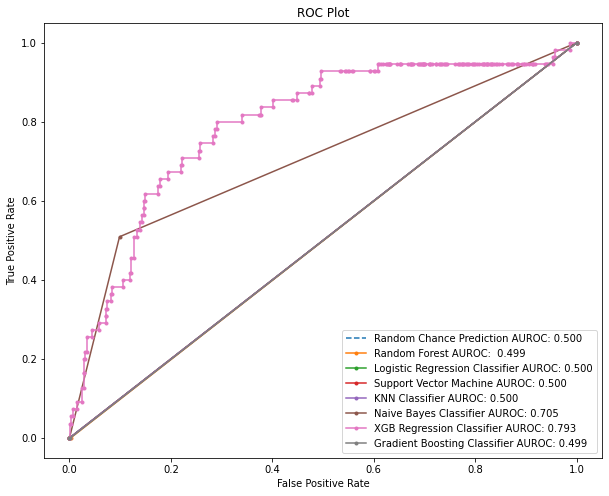

In [114]:
from matplotlib.pyplot import figure

plt.figure(figsize = (10,8))
plt.plot(r_fpr, r_tpr, linestyle = "--", label = 'Random Chance Prediction AUROC: %0.3f' %r_auc)
plt.plot(RF_fpr, RF_tpr, marker = ".", label = 'Random Forest AUROC:  %0.3f' %RF_auc)
plt.plot(LRC_fpr, LRC_tpr, marker = ".", label = 'Logistic Regression Classifier AUROC: %0.3f'%LRC_auc)
plt.plot(SVM_fpr, SVM_tpr, marker = ".", label = 'Support Vector Machine AUROC: %0.3f' %SVM_auc)
plt.plot(KNN_fpr, KNN_tpr, marker = ".", label = 'KNN Classifier AUROC: %0.3f' %KNN_auc)
plt.plot(NBC_fpr, NBC_tpr, marker = ".", label = 'Naive Bayes Classifier AUROC: %0.3f' %NBC_auc)
plt.plot(XGB_fpr, XGB_tpr, marker = ".", label = 'XGB Regression Classifier AUROC: %0.3f' %XGB_auc)
plt.plot(GBC_fpr, GBC_tpr, marker = ".", label = 'Gradient Boosting Classifier AUROC: %0.3f' %GBC_auc)

# TITLE
plt.title('ROC Plot')
# Axis Label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Legend
plt.legend()
# show plot
plt.show()